## Constructing a neural network from scratch

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Activation function
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_d(x):
    return x * (1.0 - x)

class NeuralNetwork:
    # Create the class
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(self.y.shape)
        
    # Assuming biases to be 0, calculate output using the sigmoid function as activation function
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
    # Using the sum-of-squares error as loss function, trace back to optimize the set of weights
    def backprop(self):
        d_w2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_d(self.output)))
        d_w1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_d(self.output), self.weights2.T) * sigmoid_d(self.layer1)))
        self.weights1 += d_w1
        self.weights2 += d_w2
        
    # Execute the neural network then return the output
    def run(self, epochs):
        self.loss = []
        for _ in range(epochs):
            self.feedforward()
            self.backprop()
            self.loss.append(np.sum((self.output - self.y)**2))
        return self.output

In [3]:
# Train the neural network with a set of four 3-d vectors
X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])

# Labels
y = np.array([[0], [1], [1], [0]])

# Construct the neural network
nn = NeuralNetwork(X, y)
epochs = 1500

print(nn.run(epochs))

[[0.01917001]
 [0.98354219]
 [0.97299174]
 [0.02425366]]


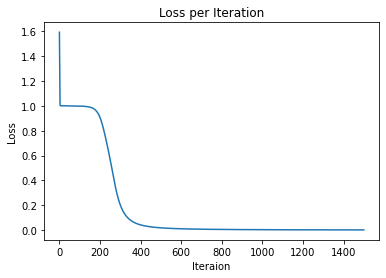

In [4]:
# Plot the loss value over time
plt.plot(np.arange(epochs), nn.loss)
plt.xlabel("Iteraion")
plt.ylabel("Loss")
plt.title("Loss per Iteration")
plt.show()

## Using the Keras libary

In [5]:
# Import the Sequential model and Dense layer from the keras library
from keras.models import Sequential
from keras.layers import Dense

In [6]:
# Construct the model
model = Sequential()

# 1st hidden layer
model.add(Dense(units=4, activation='sigmoid', input_dim=3))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

In [7]:
# Summary of the network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model for training

from keras import optimizers
sgd = optimizers.SGD(lr=1)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [10]:
np.random.seed(9)

model.fit(X, y, epochs=1500, verbose=0)
model.predict(X)

array([[0.05338483],
       [0.94167835],
       [0.94903105],
       [0.05648097]], dtype=float32)